**Dicas:**
1. O que quer recomendar?
2. Alinhe com o gestor de produtos/comercial
3. Teste !!!

In [1]:
# Importações

# Modelagem de dados
import pandas as pd # Dados
import numpy as np # Matrizes

# Analises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Ajustes no pandas
pd.set_option('display.max_rows', 100 ) # Linhas
pd.set_option('display.max_columns', 50 ) # Colunas

# Ajustes no matplot
plt.rcParams['figure.figsize'] = (15, 6)  # Tamanho do gráfico
plt.style.use('seaborn-darkgrid') # Estilo do gráfico

# **Importação dos dados**

In [2]:
# Ler os dados
Dados_Livros = pd.read_csv('Books.csv')
Dados_Avaliacao = pd.read_csv('Ratings.csv')
Dados_Usuario = pd.read_csv('Users.csv')

# Dimensçao [ Linhas, Colunas ]
Dados_Livros.shape, Dados_Avaliacao.shape, Dados_Usuario.shape

((271360, 8), (1149780, 3), (278858, 3))

In [3]:
# Primeiras Linhas
Dados_Livros.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# Info
Dados_Livros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
# Verificando
Dados_Avaliacao.head()  # Avaliação de 0 até 10

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
# Info
Dados_Avaliacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [7]:
# Verficando
Dados_Usuario.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
# Info
Dados_Usuario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


# **Modelagem dos dados**

In [9]:
# Cruzamentos de dados

# 1º Cruzamento
Tab_Cruzada = Dados_Livros.merge( Dados_Avaliacao, how='inner', on='ISBN')

# 2º Cruzamento
Tab_Cruzada = Tab_Cruzada.merge( Dados_Usuario, how='inner', on='User-ID')

# Dimensão
Tab_Cruzada.shape

(1031136, 12)

In [10]:
# Verificar
Tab_Cruzada.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN


In [11]:
# Verificar
Tab_Cruzada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031135 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031134 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031132 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Book-Rating          1031136 non-null  int64  
 10  Location             1031136 non-null  object 
 11  Age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


In [12]:
'''
  Investigação dos ruidos na base

  for Linha in Tab_Cruzada['Year-Of-Publication'].value_counts().index :
    print( Linha )

  Tab_Cruzada.loc[ Tab_Cruzada['Year-Of-Publication'] == 'DK Publishing Inc' ]

'''


# Ajustando o registro incorreto
Tab_Cruzada.iloc[ 287500, 3 ] = ''
Tab_Cruzada.iloc[ 352361, 3 ] = ''
Tab_Cruzada.iloc[ 467962, 3 ] = ''
Tab_Cruzada.iloc[ 469216, 3 ] = ''

# Conveter a coluna Ano
Tab_Cruzada['Year-Of-Publication'] = pd.to_numeric( Tab_Cruzada['Year-Of-Publication'] )

In [13]:
# Formato das Colunas
Tab_Cruzada.dtypes

ISBN                    object
Book-Title              object
Book-Author             object
Year-Of-Publication    float64
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
User-ID                  int64
Book-Rating              int64
Location                object
Age                    float64
dtype: object

In [14]:
# Verificando
Tab_Cruzada['Location'].head(5)

0    stockton, california, usa
1     timmins, ontario, canada
2     timmins, ontario, canada
3     timmins, ontario, canada
4     timmins, ontario, canada
Name: Location, dtype: object

In [15]:
# Verificando
Tab_Cruzada['Location'].tail(5)

1031131                       venice, florida, usa
1031132                   tioga, pennsylvania, usa
1031133                      madrid, madrid, spain
1031134                  grand prairie, texas, usa
1031135    bielefeld, nordrhein-westfalen, germany
Name: Location, dtype: object

In [16]:
# Técnica de tratamento de texto
def Extrair_Pais( Regiao ):
  '''
    Função para extrair o nome do pais na coluna região
  '''
  # Incluindo a inforção
  Registro = Regiao
  # Fatiar
  Registro = Regiao.split(',')
  # Buscar
  Fracao = Registro[-1].upper()
  #Retorno
  return Fracao

# Criando a coluna
Tab_Cruzada['Pais'] = Tab_Cruzada['Location'].apply( Extrair_Pais )

# Verificando
Tab_Cruzada.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Pais
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,USA
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,CANADA
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN,CANADA
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN,CANADA
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN,CANADA


In [17]:
# Nulos
Tab_Cruzada.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         4
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
User-ID                     0
Book-Rating                 0
Location                    0
Age                    277835
Pais                        0
dtype: int64

In [18]:
# Unicos
Tab_Cruzada.nunique()

ISBN                   270151
Book-Title             241071
Book-Author            101588
Year-Of-Publication       116
Publisher               16729
Image-URL-S            269842
Image-URL-M            269842
Image-URL-L            269839
User-ID                 92106
Book-Rating                11
Location                22480
Age                       141
Pais                      288
dtype: int64

In [19]:
# Renomear as colunas
Tab_Cruzada.rename(
    columns={
        'Book-Title' : 'Titulo',
        'Book-Author' : 'Autor',
        'Year-Of-Publication' : 'Ano_Publicacao',
        'Publisher' : 'Editora',
        'User-ID' :'Id_Cliente',
        'Book-Rating' : 'Avaliacao',
        'Location' : 'Localizacao',
        'Age' : 'Idade'
    }, inplace=True
)

# Verificar
Tab_Cruzada.columns

Index(['ISBN', 'Titulo', 'Autor', 'Ano_Publicacao', 'Editora', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'Id_Cliente', 'Avaliacao', 'Localizacao',
       'Idade', 'Pais'],
      dtype='object')

# **Data Visualization - Exploração**

In [20]:
# Analise descritiva
Tab_Cruzada.describe()

,Ano_Publicacao,Id_Cliente,Avaliacao,Idade
count,1.031132e+06,1.031136e+06,1.031136e+06,753301.000000
mean,1.968195e+03,1.405945e+05,2.839051e+00,37.397648
std,2.311015e+02,8.052466e+04,3.854157e+00,14.098254
min,0.000000e+00,2.000000e+00,0.000000e+00,0.000000
25%,1.992000e+03,7.041500e+04,0.000000e+00,28.000000
50%,1.997000e+03,1.412100e+05,0.000000e+00,35.000000
75%,2.001000e+03,2.114260e+05,7.000000e+00,45.000000
max,2.050000e+03,2.788540e+05,1.000000e+01,244.000000


In [21]:
# Remover as avaliações zeradas
Tab_Cruzada = Tab_Cruzada.loc[ Tab_Cruzada['Avaliacao'] > 0 ]

# Verificar
Tab_Cruzada.isnull().sum(), Tab_Cruzada.shape

(ISBN                   0
 Titulo                 0
 Autor                  1
 Ano_Publicacao         1
 Editora                2
 Image-URL-S            0
 Image-URL-M            0
 Image-URL-L            1
 Id_Cliente             0
 Avaliacao              0
 Localizacao            0
 Idade             114221
 Pais                   0
 dtype: int64,
 (383842, 13))

In [22]:
# Verificar
Tab_Cruzada['Avaliacao'].describe()

count    383842.000000
mean          7.626701
std           1.841339
min           1.000000
25%           7.000000
50%           8.000000
75%           9.000000
max          10.000000
Name: Avaliacao, dtype: float64

In [23]:
# Analise grafica
# plt.title('Analisando a avaliação')
# sns.boxplot( data=Tab_Cruzada, x='Avaliacao');

In [24]:
# Analise
Analise = Tab_Cruzada.groupby( by=['Titulo'] ).agg(
    Quantidade = ('Titulo', 'count'),
    Media = ('Avaliacao', 'mean'),
    Max = ('Avaliacao', 'max'),
    Min = ('Avaliacao', 'min'),
    Mediana = ('Avaliacao', 'median'),
)

# Verificando
Analise.head()

,Quantidade,Media,Max,Min,Mediana
Titulo,,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1,9.000000,9,9,9.0
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000,8,8,8.0
Dark Justice,1,10.000000,10,10,10.0
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7,7.142857,10,1,7.0
Final Fantasy Anthology: Official Strategy Guide (Brady Games),2,10.000000,10,10,10.0


In [25]:
# Verificar
Analise.sort_values('Quantidade', ascending=False ).head()

,Quantidade,Media,Max,Min,Mediana
Titulo,,,,,
The Lovely Bones: A Novel,707,8.185290,10,1,8.0
Wild Animus,581,4.390706,10,1,4.0
The Da Vinci Code,494,8.439271,10,1,9.0
The Secret Life of Bees,406,8.477833,10,2,9.0
The Nanny Diaries: A Novel,393,7.437659,10,1,8.0


In [26]:
# Vericar
Analise.sort_values(['Media', 'Quantidade' ], ascending=False ).head()

,Quantidade,Media,Max,Min,Mediana
Titulo,,,,,
Postmarked Yesteryear: 30 Rare Holiday Postcards,11,10.0,10,10,10.0
The Sneetches and Other Stories,8,10.0,10,10,10.0
Natural California: A Postcard Book,7,10.0,10,10,10.0
Uncle John's Supremely Satisfying Bathroom Reader (Uncle John's Bathroom Reader),7,10.0,10,10,10.0
"Oh, the Thinks You Can Think! (I Can Read It All by Myself Beginner Books)",6,10.0,10,10,10.0


In [27]:
# Analise Qtd x Avaliacao

# px.scatter(
#     # Dados
#     data_frame=Analise,
#     # Parametros
#     x='Quantidade', y='Media',
#     # Titulo
#     title='Média x Quantidade - Titulos',
#     # Upgrade
#     # marginal_y='rug', marginal_x='histogram'
# )

In [28]:
# Correlação
Analise.corr()

,Quantidade,Media,Max,Min,Mediana
Quantidade,1.000000,0.018880,0.175572,-0.251497,0.036604
Media,0.018880,1.000000,0.889722,0.842385,0.989839
Max,0.175572,0.889722,1.000000,0.530760,0.887792
Min,-0.251497,0.842385,0.530760,1.000000,0.804023
Mediana,0.036604,0.989839,0.887792,0.804023,1.000000


In [29]:
# Analise
Analise['Quantidade'].describe()

count    135567.000000
mean          2.831382
std           9.135691
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         707.000000
Name: Quantidade, dtype: float64

In [30]:
# 
def Classificao_Quantidade( Quantidade ):
  '''
    Agrupar a quantidade
  '''

  if int( Quantidade ) <= 5:
    return '1-5 Avaliações'

  elif int( Quantidade) <=10:
    return '6-10 Avaliações'

  elif int(Quantidade) <= 50:
    return '11-50 Avaliações'

  elif int(Quantidade) <= 100:
    return '51-100 Avaliações'

  else:
    return '>101 Avaliações'

# Aplicação
Pizza = Analise['Quantidade'].apply( Classificao_Quantidade ).value_counts( normalize=True )

# Tranformar em um DataFrame
# Pizza = pd.DataFrame( Pizza ).reset_index()

# # Plot
# px.pie( 
#     # DAdos
#     data_frame=Pizza,
#     # Paramewtros
#     names='index', values='Quantidade',
#     # Titulo
#     title='Divisão das Quantidades'
# )

In [31]:
# Verificando
Pizza

1-5 Avaliações       0.920010
6-10 Avaliações     0.042783
11-50 Avaliações     0.032589
51-100 Avaliações    0.003201
>101 Avaliações      0.001416
Name: Quantidade, dtype: float64

In [32]:
# Publicação
Anlaise_Ano = Tab_Cruzada['Ano_Publicacao'].value_counts().sort_index().reset_index()

# Verificando
Anlaise_Ano.describe()

,index,Ano_Publicacao
count,105.000000,105.000000
mean,1934.028571,3655.628571
std,210.090432,8051.797181
min,0.000000,1.000000
25%,1937.000000,4.000000
50%,1963.000000,63.000000
75%,1989.000000,1652.000000
max,2050.000000,37986.000000


In [33]:
# Plot

# Filtrando o ano
Filtro = Anlaise_Ano.loc[ (Anlaise_Ano['index'] > 1990) & ( Anlaise_Ano['index'] < 2020 ) ]

# # Plot
# plt.title('Analisando ano de publicação')
# plt.bar( Filtro['index'], Filtro['Ano_Publicacao'] );

In [34]:
Tab_Cruzada.columns

Index(['ISBN', 'Titulo', 'Autor', 'Ano_Publicacao', 'Editora', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'Id_Cliente', 'Avaliacao', 'Localizacao',
       'Idade', 'Pais'],
      dtype='object')

In [35]:
# Ranikg dos Autores
Tab_Cruzada.groupby( by='Autor' ).agg(
    Quantidade = ('Avaliacao', 'count'),
    Media = ('Avaliacao', 'mean'),
).sort_values('Quantidade', ascending=False ).head(10)

,Quantidade,Media
Autor,,
Stephen King,4639,7.815046
Nora Roberts,2938,7.629680
John Grisham,2550,7.523137
James Patterson,2387,7.697947
J. K. Rowling,1746,8.970218
Mary Higgins Clark,1677,7.503280
Janet Evanovich,1490,7.944966
Dean R. Koontz,1475,7.572203
Anne Rice,1245,7.387952


In [36]:
# Concetração das avaliações
Tab_Cruzada['Pais'].value_counts( normalize=True ).head(10) * 100

 USA               68.378135
 CANADA             9.267876
 UNITED KINGDOM     3.854190
 GERMANY            3.165625
                    2.737845
 SPAIN              1.874990
 AUSTRALIA          1.821322
 N/A                1.811943
 FRANCE             1.207789
 PORTUGAL           0.897505
Name: Pais, dtype: float64

In [37]:
# Concetração das avaliações
Tab_Cruzada['Pais'].value_counts( normalize=True ).cumsum().head(10) * 100

 USA               68.378135
 CANADA            77.646011
 UNITED KINGDOM    81.500201
 GERMANY           84.665826
                   87.403671
 SPAIN             89.278662
 AUSTRALIA         91.099984
 N/A               92.911927
 FRANCE            94.119716
 PORTUGAL          95.017221
Name: Pais, dtype: float64

In [38]:
# Idade
# plt.title('Análise das idades')
# sns.boxplot( data=Tab_Cruzada, x='Idade' );

# **Construção do Modelo**

In [39]:
# Ajustar ( Avaliação dos Livros --> Tab_Cruzada )

# Ajustando a Tabela de Avaliacoes
Avaliacoes = Analise.reset_index().iloc[:, 0:2]

# Cruzando os dados
Tab_Final = Tab_Cruzada.merge( Avaliacoes, how='inner', on='Titulo' )

# VErificando
Tab_Final.head()

,ISBN,Titulo,Autor,Ano_Publicacao,Editora,Image-URL-S,Image-URL-M,Image-URL-L,Id_Cliente,Avaliacao,Localizacao,Idade,Pais,Quantidade
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,CANADA,9
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",NaN,N/A,9
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544,8,"toronto, ontario, canada",30.0,CANADA,9
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,116866,9,"ottawa, ,",NaN,,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,123629,9,"kingston, ontario, canada",NaN,CANADA,9


In [40]:
# Filtrar
Livros_Avaliados = Tab_Final.loc[ Tab_Final['Quantidade'] >= 50 ]

# Dimensao
Livros_Avaliados.shape

(65477, 14)

In [41]:
# Duplicados
Livros_Avaliados.duplicated().sum()

0

In [42]:
# Gerar a Metriz 
Matriz = Livros_Avaliados.pivot_table( values='Avaliacao', index='Titulo', columns='Id_Cliente' )

# Retirar os NAN
Matriz.fillna( 0, inplace=True)

# VErificar
Matriz.head()

Id_Cliente,9,16,26,32,42,51,91,97,99,114,125,165,169,183,185,224,226,242,243,244,254,256,272,280,332,...,278633,278641,278645,278653,278663,278672,278683,278698,278723,278732,278740,278755,278773,278786,278798,278800,278807,278824,278828,278832,278836,278843,278844,278846,278854
Titulo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Verificando
Tab_Cruzada.loc[ Tab_Cruzada['Titulo'] == '1984' ].head()

,ISBN,Titulo,Autor,Ano_Publicacao,Editora,Image-URL-S,Image-URL-M,Image-URL-L,Id_Cliente,Avaliacao,Localizacao,Idade,Pais
2713,0452262933,1984,George Orwell,1983.0,Plume Books,http://images.amazon.com/images/P/0452262933.0...,http://images.amazon.com/images/P/0452262933.0...,http://images.amazon.com/images/P/0452262933.0...,11676,10,"n/a, n/a, n/a",NaN,N/A
33641,0451519841,1984,George Orwell,1980.0,New Amer Library,http://images.amazon.com/images/P/0451519841.0...,http://images.amazon.com/images/P/0451519841.0...,http://images.amazon.com/images/P/0451519841.0...,7346,8,"sunnyvale, california, usa",49.0,USA
36405,0451524934,1984,George Orwell,1990.0,Signet Book,http://images.amazon.com/images/P/0451524934.0...,http://images.amazon.com/images/P/0451524934.0...,http://images.amazon.com/images/P/0451524934.0...,16795,8,"mechanicsville, maryland, usa",47.0,USA
106795,0451519841,1984,George Orwell,1980.0,New Amer Library,http://images.amazon.com/images/P/0451519841.0...,http://images.amazon.com/images/P/0451519841.0...,http://images.amazon.com/images/P/0451519841.0...,197364,8,"cumming, georgia, usa",30.0,USA
129342,0451524934,1984,George Orwell,1990.0,Signet Book,http://images.amazon.com/images/P/0451524934.0...,http://images.amazon.com/images/P/0451524934.0...,http://images.amazon.com/images/P/0451524934.0...,240567,8,"hawthorne, new jersey, usa",33.0,USA


In [44]:
# Trnasformação para vetores
from scipy.sparse import csc_matrix
Matriz_Sparse = csc_matrix( Matriz )

Matriz_Sparse

<651x24863 sparse matrix of type '<class 'numpy.float64'>'
	with 65081 stored elements in Compressed Sparse Column format>

In [45]:
# Exemplo da função
csc_matrix(  (4, 4), dtype=np.int8 ).toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [46]:
# Criar o Modelo
from sklearn.neighbors import NearestNeighbors

# Parametros
Modelo = NearestNeighbors(
    # Quantidade de recomendações
    n_neighbors=5,
    # Algoritmo
    algorithm='brute',
    # metrica de distancia
    metric='minkowski'
)

# Fitar o modelo
Modelo.fit( Matriz_Sparse )

NearestNeighbors(algorithm='brute')

In [47]:
# Recomendações
# Escolher_Livro

# Descobrir Libros Harry
for Posicao, Titulo in enumerate(Matriz.index):

  # Harry
  if 'Clara' in Titulo:
    print( Posicao, Titulo )

In [48]:
# Seleionando o Livro ##### CLIENTE COMPROU !!!!!! ######
Selecionar_Livro = Matriz.iloc[ 216, :].values.reshape( 1, -1 )

# Previsão do Modelo
Distancia, Recomendacao = Modelo.kneighbors( Selecionar_Livro )

## AVALIAÇAO / RENTABILIDADE /  SERIES / NOTICIAS

#### RECOMENDAÇÔES ######
# Ver as sugestões
for Loop in range( len(Recomendacao) ):

  print( Matriz.index[ Recomendacao[Loop] ] )

Index(['Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', '4 Blondes'],
      dtype='object', name='Titulo')


In [49]:
Distancia

array([[  0.        , 136.33964941, 150.46714296, 153.37372656,
        156.98168683]])

# **Entendimento do Algoritmo**

## **Tipos de Aprendizadoo**

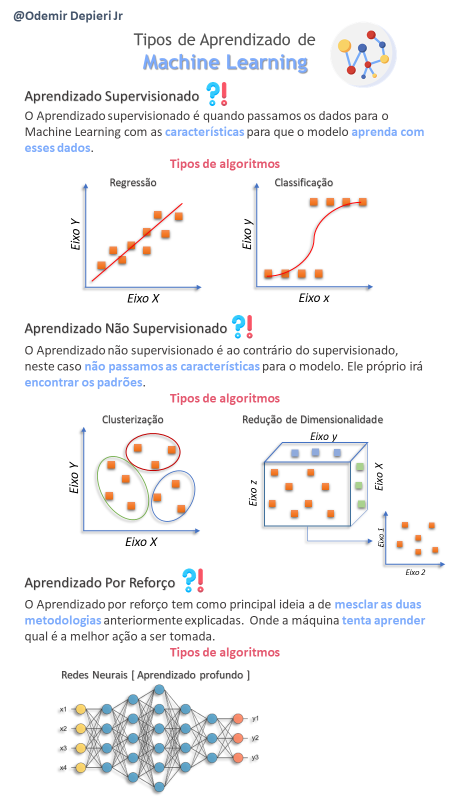

## **Distâncias**

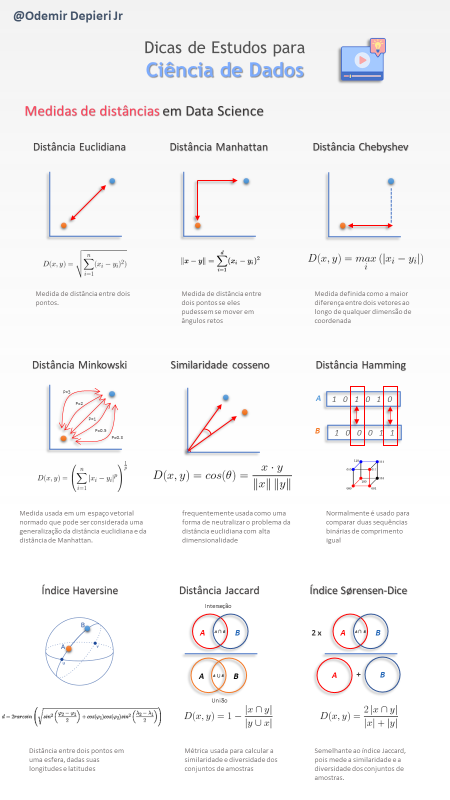

## **Algoritmos**

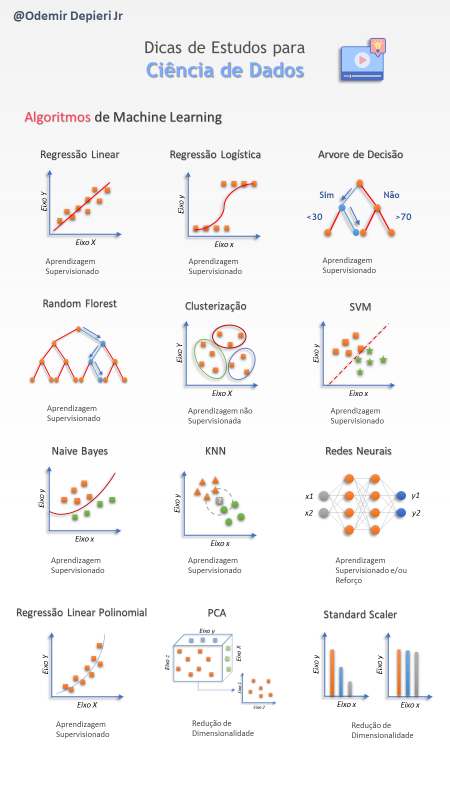

# **Entedimento do Algoritmo**

In [50]:
# Matriz
Dados = np.array(
    [
        [5, 5],
        [4, 3],
        [8, 2],
        [5, 8],
        [6, 5],
        [2, 1]
    ]
)

# Tabela exemplo
Tabela_Exemplo = pd.DataFrame( Dados )
Tabela_Exemplo

,0,1
0,5,5
1,4,3
2,8,2
3,5,8
4,6,5
5,2,1


In [62]:
# # Plot
# plt.title('Analise', loc='left')
# sns.scatterplot( data=Tabela_Exemplo, x=0, y=1, s=300);

In [52]:
# Treinar o modelo
Modelo_Exemplo = NearestNeighbors( n_neighbors=2, metric='euclidean')
Modelo_Exemplo.fit( Dados )

NearestNeighbors(metric='euclidean', n_neighbors=2)

In [53]:
# Fazendo a recomendação
Distancias, Indices = Modelo_Exemplo.kneighbors( [[7, 3]] )

print( Distancias )
print( Indices )

[[1.41421356 2.23606798]]
[[2 4]]


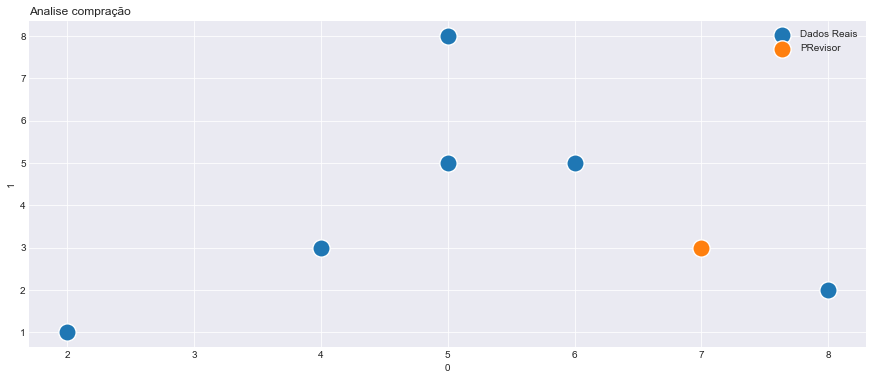

In [54]:
# Plot
plt.title('Analise compração', loc='left')
sns.scatterplot( data=Tabela_Exemplo, x=0, y=1, s=300)

Previsor = pd.DataFrame( [[7, 3]] )
sns.scatterplot( data=Previsor, x=0, y=1, s=300)
plt.legend(['Dados Reais', 'PRevisor']);

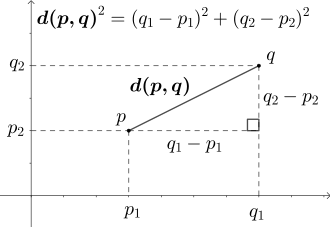

In [55]:
# Calculo 
import math

# Loop na base  de dados
for Col1, Col2  in zip( Tabela_Exemplo[0], Tabela_Exemplo[1] ):

  # Calculando distancia euclidiana
  Distancia = math.sqrt( (( 7 - Col1 ) ** 2) + (( 3 - Col2 ) ** 2) )

  print( Col1, Col2, 'Distâncias dos dados: ', round( Distancia, 6 ) )

5 5 Distâncias dos dados:  2.828427
4 3 Distâncias dos dados:  3.0
8 2 Distâncias dos dados:  1.414214
5 8 Distâncias dos dados:  5.385165
6 5 Distâncias dos dados:  2.236068
2 1 Distâncias dos dados:  5.385165


# **Simulador**

In [56]:
# Frameworks
# Plotar a imagem
import PIL
import urllib
import requests
import matplotlib.image as mpimg

In [63]:
# Filtrando o link da capa do Harry poter
Link = Tab_Cruzada.loc[Tab_Cruzada['Titulo'] == '4 Blondes'].head(1)[
    'Image-URL-L'].values[0]

# Buscar as informações
Imagem = PIL.Image.open( urllib.request.urlopen( Link ) )

# Imagem

In [58]:
# Lista para receber os links das recomendações
Lista_URL = []

# Loop nas recomendações
for Loop in range( len(Recomendacao) ):

  # Filtro na matriz
  Selecao_Loop = ( Matriz.index[ Recomendacao[Loop] ] )

  # Atribuindo a Lista
  Lista_URL = Selecao_Loop


# Filtrando o link das recomendações
Link_Recomendao_01 = Tab_Cruzada.loc[ Tab_Cruzada['Titulo'] == Lista_URL[1] ].head(1)['Image-URL-L'].values[0]
Link_Recomendao_02 = Tab_Cruzada.loc[ Tab_Cruzada['Titulo'] == Lista_URL[2] ].head(1)['Image-URL-L'].values[0]
Link_Recomendao_03 = Tab_Cruzada.loc[ Tab_Cruzada['Titulo'] == Lista_URL[3] ].head(1)['Image-URL-L'].values[0]
Link_Recomendao_04 = Tab_Cruzada.loc[ Tab_Cruzada['Titulo'] == Lista_URL[4] ].head(1)['Image-URL-L'].values[0]

In [59]:
# atribuindo as imagens
Imagem_01 = PIL.Image.open( urllib.request.urlopen( Link_Recomendao_01 ) )
Imagem_02 = PIL.Image.open( urllib.request.urlopen( Link_Recomendao_02 ) )
Imagem_03 = PIL.Image.open( urllib.request.urlopen( Link_Recomendao_03 ) )
Imagem_04 = PIL.Image.open( urllib.request.urlopen( Link_Recomendao_04 ) )

In [60]:
# Construir relatorio
import plotly.graph_objects as Go
from plotly.subplots import make_subplots

In [65]:
# Titulos = ['Seleção', 'Recomendação 1', 'Recomendação 2', 'Recomendação 3', 'Recomendação 4']

# # Criando a Figura
# Figura = make_subplots(
#     rows=1,
#     cols=5,
#     subplot_titles=Titulos
# )

# # Ajustando o layout
# Figura.update_layout(
#     height=500,
#     width=1200,
#     title_text='Sistema de recomendação',
#     showlegend=False
# )

# # Imagem da Seleção
# Figura.add_trace(
#     Go.Image(
#         z=Imagem,
#     ),
#     row=1, col=1
# )

# # Imagem da Recomendação 1
# Figura.add_trace(
#     Go.Image(
#         z=Imagem_01,
#     ),
#     row=1, col=2
# )

# # Imagem da Recomendação 2
# Figura.add_trace(
#     Go.Image(
#         z=Imagem_02,
#     ),
#     row=1, col=3
# )

# # Imagem da Recomendação 3
# Figura.add_trace(
#     Go.Image(
#         z=Imagem_03,
#     ),
#     row=1, col=4
# )

# # Imagem da Recomendação 4
# Figura.add_trace(
#     Go.Image(
#         z=Imagem_04,
#     ),
#     row=1, col=5
# )

# Mostrar
# Figura.show()